In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)



In [20]:
df = pd.read_csv("C:/Users/User/Desktop/Nairobi House Price Prediction/data/clean_listings.csv")

# Dataset Overview

In [21]:
df.shape


(267, 11)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        267 non-null    object 
 1   property_type   267 non-null    object 
 2   bedrooms        267 non-null    int64  
 3   bathrooms       267 non-null    int64  
 4   size_sqft       267 non-null    float64
 5   amenities       264 non-null    object 
 6   price_kes       267 non-null    int64  
 7   listing_date    267 non-null    object 
 8   price_per_sqft  267 non-null    float64
 9   amenity_score   267 non-null    int64  
 10  month           267 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 23.1+ KB


In [23]:
df.describe()


,bedrooms,bathrooms,size_sqft,price_kes,price_per_sqft,amenity_score,month
count,267.000000,267.000000,267.000000,2.670000e+02,2.670000e+02,267.000000,267.0
mean,2.602996,3.029963,1786.864382,2.908251e+07,9.406429e+04,1.041199,2.0
std,1.400748,1.802004,2995.400554,4.113521e+07,4.073961e+05,0.249411,0.0
min,1.000000,1.000000,32.290000,4.310000e+06,1.146986e+03,0.000000,2.0
25%,2.000000,1.000000,731.950000,9.000000e+06,1.010755e+04,1.000000,2.0
50%,2.000000,3.000000,1184.040000,1.400000e+07,1.137010e+04,1.000000,2.0
75%,4.000000,5.000000,1738.385000,2.779000e+07,1.380868e+04,1.000000,2.0
max,8.000000,9.000000,43099.060000,3.500000e+08,4.064569e+06,2.000000,2.0


## After cleaning, the dataset contains 267 listings with no missing values in key numerical features.

## Top 10 Most Expensive Locations by Price

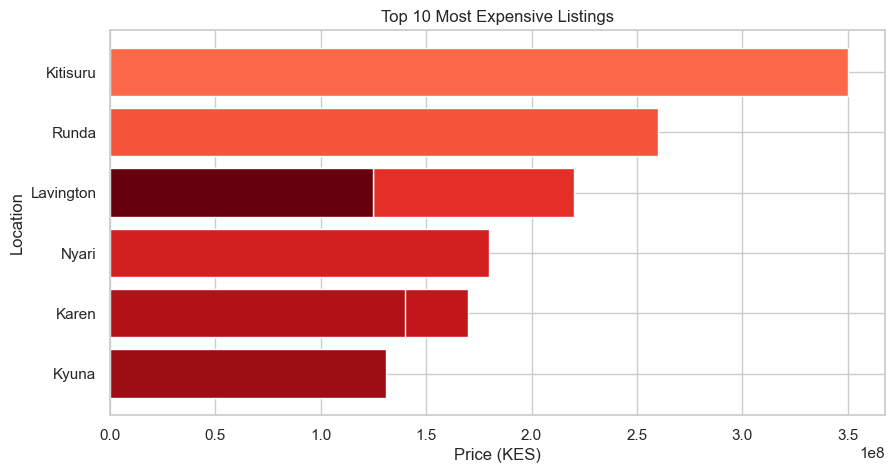

In [24]:
expensive_listings = df.sort_values('price_kes', ascending=False).head(10)

# Gradient using Matplotlib
colors = plt.cm.Reds(np.linspace(0.5, 1, len(expensive_listings)))
plt.barh(expensive_listings['location'], expensive_listings['price_kes'], color=colors)
plt.xlabel("Price (KES)")
plt.ylabel("Location")
plt.title("Top 10 Most Expensive Listings")
plt.gca().invert_yaxis()
plt.show()


## Top 10 Cheapest Listings

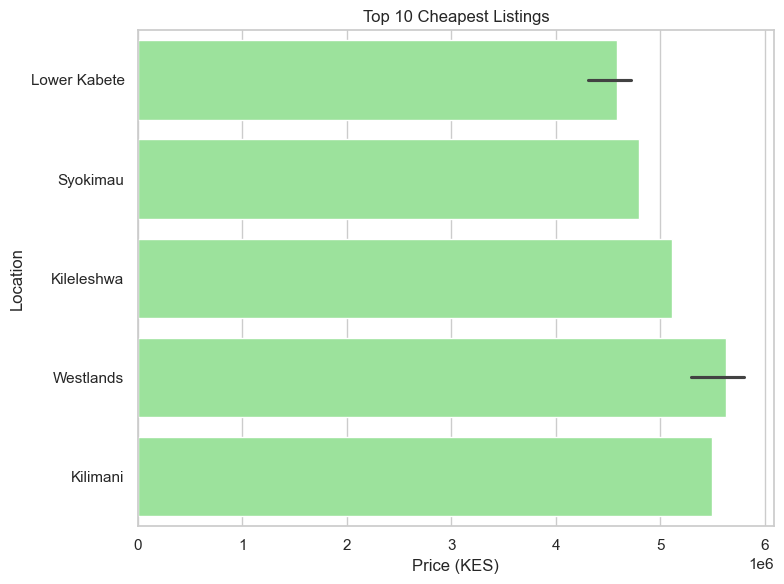

In [28]:
# Top 10 cheapest listings
cheapest_listings = df.sort_values('price_kes', ascending=True).head(10)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    x='price_kes',
    y='location',
    data=cheapest_listings,
    color='lightgreen'
)
plt.title("Top 10 Cheapest Listings")
plt.xlabel("Price (KES)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

## Locations with Most Listings (Top 10)

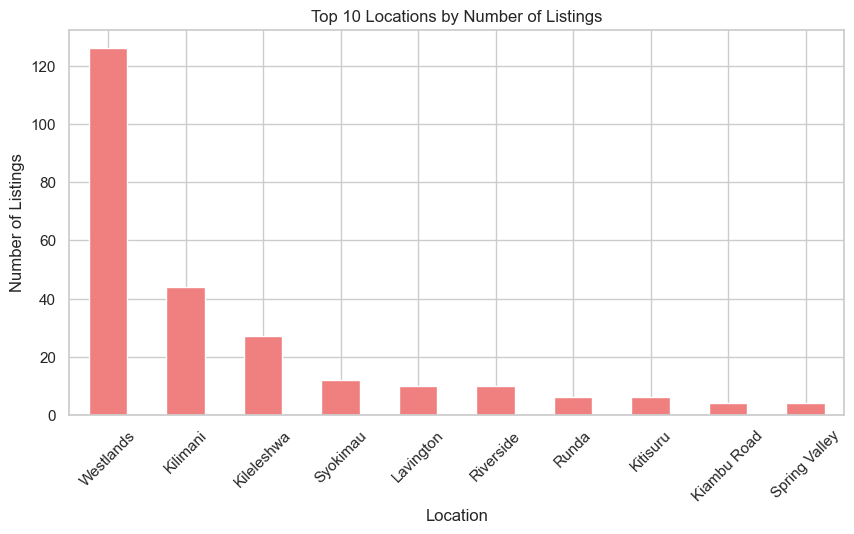

In [29]:
top_locations_count = df['location'].value_counts().head(10)

top_locations_count.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Locations by Number of Listings")
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


## Locations with Highest Price per Sqft

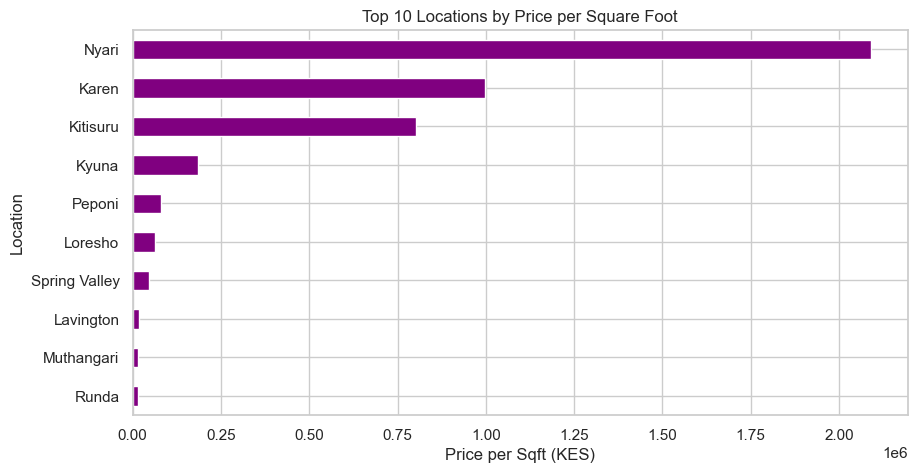

In [30]:
top_pps_locations = df.groupby('location')['price_per_sqft'].median().sort_values(ascending=False).head(10)

top_pps_locations.plot(kind='barh', color='purple')
plt.title("Top 10 Locations by Price per Square Foot")
plt.xlabel("Price per Sqft (KES)")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()


## Top 10 Most Expensive Locations by Median Price

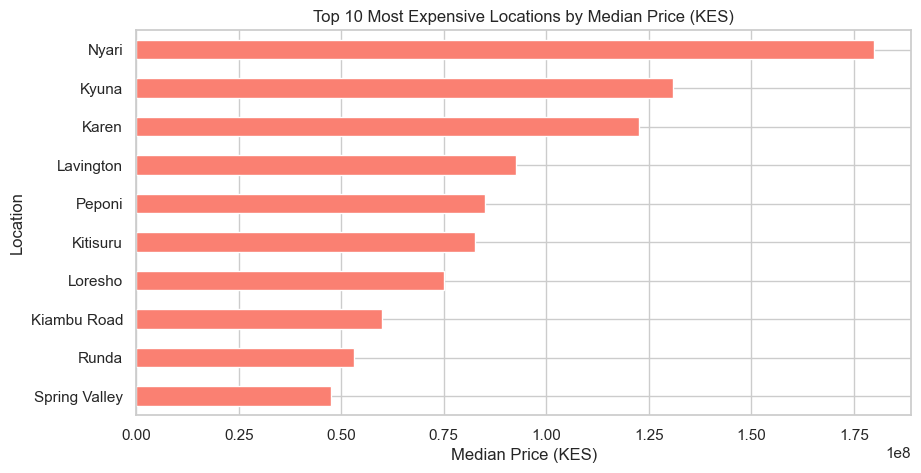

In [31]:
expensive_locations = (
    df.groupby('location')['price_kes']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

expensive_locations.plot(kind='barh', color='salmon')
plt.title("Top 10 Most Expensive Locations by Median Price (KES)")
plt.xlabel("Median Price (KES)")
plt.ylabel("Location")
plt.gca().invert_yaxis()  # highest price on top
plt.show()


## Top 10 Cheapest Locations by Median Price

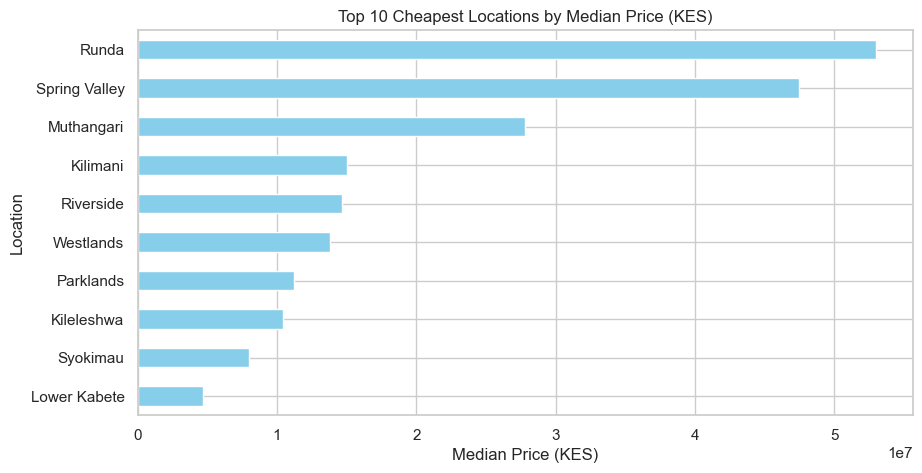

In [32]:
cheapest_locations = (
    df.groupby('location')['price_kes']
    .median()
    .sort_values()
    .head(10)
)

cheapest_locations.plot(kind='barh', color='skyblue')
plt.title("Top 10 Cheapest Locations by Median Price (KES)")
plt.xlabel("Median Price (KES)")
plt.ylabel("Location")
plt.show()


## Average Price by Property Type

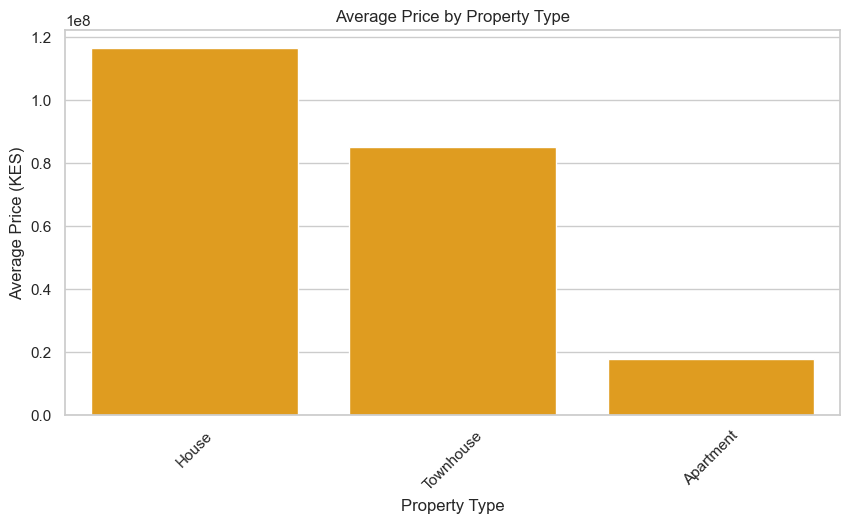

In [33]:
avg_price_type = df.groupby('property_type')['price_kes'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_type.index, y=avg_price_type.values, color='orange')
plt.title("Average Price by Property Type")
plt.ylabel("Average Price (KES)")
plt.xlabel("Property Type")
plt.xticks(rotation=45)
plt.show()


## Median Price by Number of Bedrooms

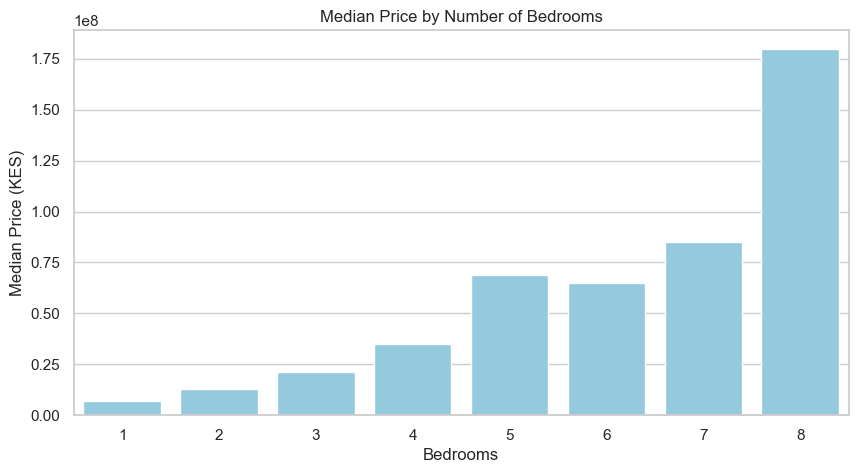

In [34]:
bedrooms_price = df.groupby('bedrooms')['price_kes'].median().sort_index()

sns.barplot(x=bedrooms_price.index, y=bedrooms_price.values, color='skyblue')
plt.title("Median Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Median Price (KES)")
plt.show()


## Top 10 Listings by Amenity Score

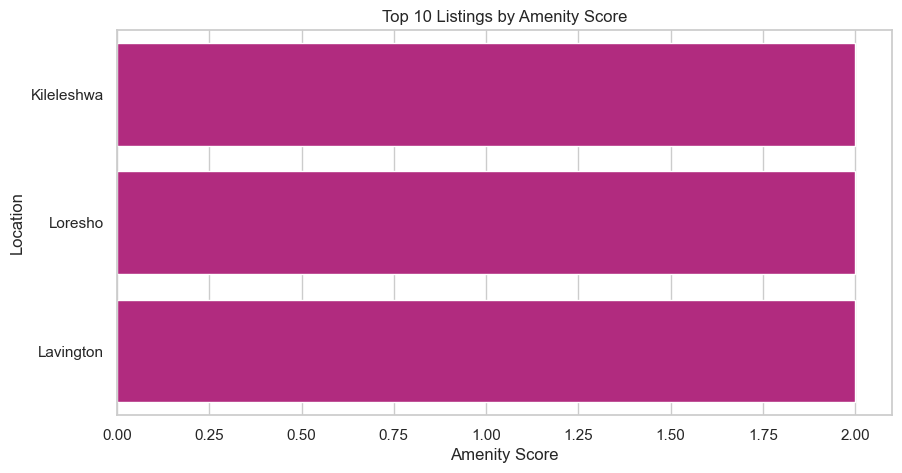

In [37]:
top_amenities = df.sort_values('amenity_score', ascending=False).head(10)

sns.barplot(
    x='amenity_score',
    y='location',
    data=top_amenities,
    color='mediumvioletred'
)
plt.title("Top 10 Listings by Amenity Score")
plt.xlabel("Amenity Score")
plt.ylabel("Location")
plt.show()


## simple linear regression line to show relationship between property size and price.

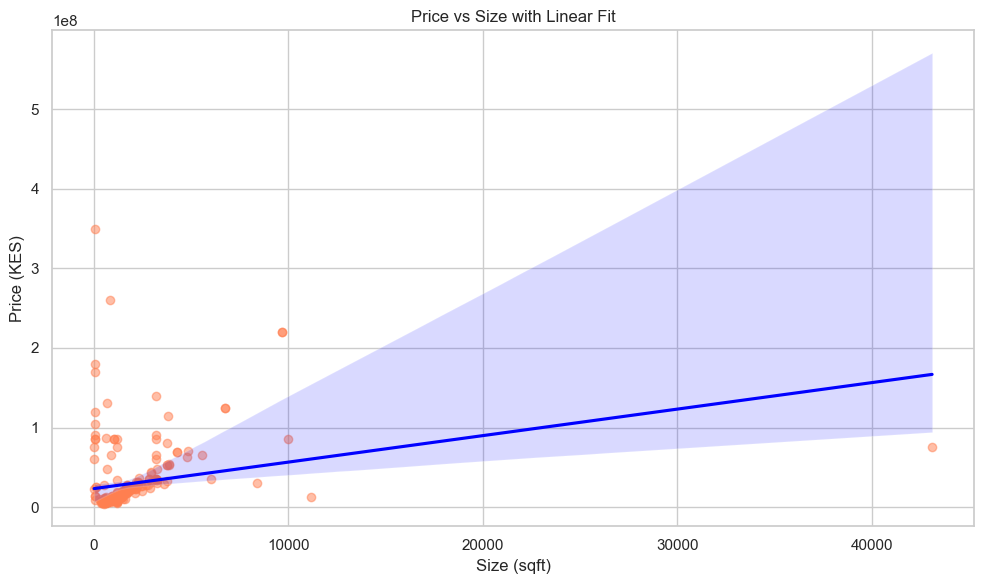

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='size_sqft', y='price_kes', data=df,
            scatter_kws={'alpha':0.5, 'color':'coral'},
            line_kws={'color':'blue'})
plt.xlabel('Size (sqft)')
plt.ylabel('Price (KES)')
plt.title('Price vs Size with Linear Fit')
plt.tight_layout()
plt.show()
#The blue line shows the linear trend.
#Slope tells you roughly how much price increases per sqft.